# Exploring minima of Homsets

This notebook explores the distribution of minima of homsets of supersingular elliptic curves with scalar level structure. To run it you will need the following python packages:

In [1]:
import pandas as pd, numpy as np, csv, gzip
from matplotlib import pyplot as plt

The dataset was pre-generated. To generate a new one, install Sagemath and then run

```
./minima_scalar.py <p> <N> <#_of_samples>
```

This geneares a dataset containing the minima of random left ideal subclasses of non-maximal orders associated to scalar level structures. Concretely, the dataset is generated as follows:

1. Starting from a fixed order $O_0$, take a random ideal walk (base $257$) of length $≈ \log(p^2)/\log(257)$ (i.e., the ideal has norm $257^a ≈ p^2$. Let $O$ be the right order.
2. Starting from $O$, take a random ideal $I$ walk of length $≈ \log(p^2 N^3)/\log(257)$. Let $d$ be the norm of $I$.
3. Define the sub-order $O_S = ℤ + NO$ and the sub-lattice $I_S = I ∩ O(S,E) = dℤ + NI ⊂ I$. The form is the sub-order corresponding to all endomorphisms that stabilize¹ any scalar level structure, the latter is the sub-lattice of quaternions that, under Deuring's correspondence, act like $φ_I$ on any scalar level structure.

The dataset contains the four minima² of $I_S$, divided by $d\sqrt{p N^3}$, in four columns names `I1 ... I4`, as well as their classes modulo 1024 in four columns named `p1 ... p4`.

¹By "stabilize" we mean that $ω·(P,Q) = (cP, cQ)$, for $c ∈ ℤ/Nℤ$ not necessarily invertible.

²"Minima" here is a misnomer: the dataset actually contains the norms of an LLL-reduced basis, ordered increasingly. But "experience" points to this being the same as the actual minima for all practical purposes.

In [2]:
# parse the data into a Pandas dataframe
with gzip.open('p2e62_N1024s_p.csv.gz', 'rt') as f:
    # first line is a (useful) comment
    for i in range(1):
        print(next(f))
    df = pd.DataFrame(csv.reader(f), columns=['I1', 'I2', 'I3', 'I4', 'p1', 'p2', 'p3', 'p4'], dtype=float)

# p=4611686018427388039 N=1024 scalar + parity



## The product of the minima

The product of the minima appears to be bounded between $p^2N^6/16$ and $p^2N^6/4$ and to distribute exactly like in the plain non-level-structure case.

<Axes: >

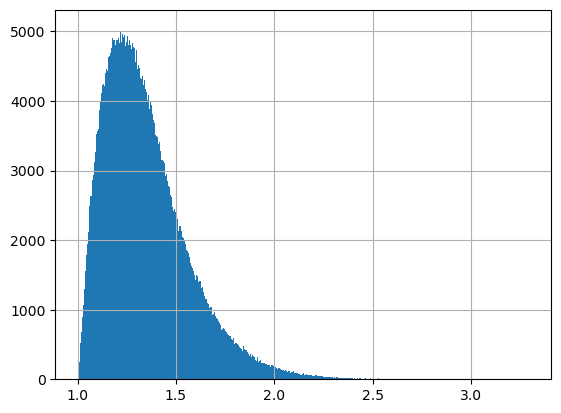

In [3]:
df['prodI'] = df['I1'] * df['I2'] * df['I3'] * df['I4'] * 16
df['prodI'].hist(bins=1000)

In [4]:
df['prodI'].describe()

count    1000000.000000
mean           1.349049
std            0.217131
min            1.001171
25%            1.189038
50%            1.307627
75%            1.462581
max            3.291286
Name: prodI, dtype: float64

We observe the usual correlation between the first minimum and the product of the minima. Much less so between the product and any other minimum.

<Axes: xlabel='I1', ylabel='prodI'>

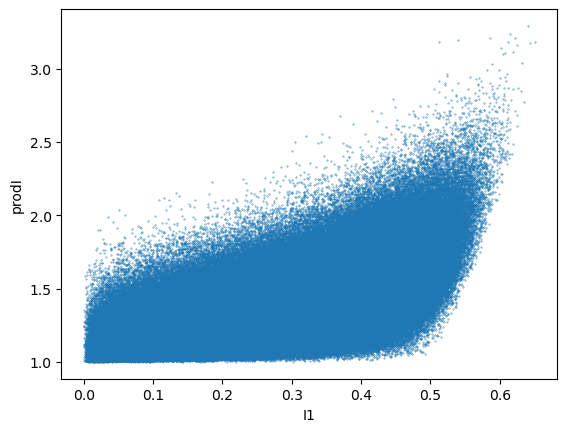

In [5]:
df.plot('I1', 'prodI', kind='scatter', s=0.1)

In [6]:
df[['I1', 'I2', 'I3', 'I4', 'prodI']].corr()

,I1,I2,I3,I4,prodI
I1,1.000000,0.059125,-0.490332,-0.301276,0.639316
I2,0.059125,1.000000,-0.001334,-0.269556,0.329083
I3,-0.490332,-0.001334,1.000000,0.019118,-0.179259
I4,-0.301276,-0.269556,0.019118,1.000000,-0.204424
prodI,0.639316,0.329083,-0.179259,-0.204424,1.000000


## The minima

All the minima appear to be distributed more or less like in the plain case, maybe 2nd and 3rd are a bit more spread (but we don't have a similar experiment for plain ideals yet).

<Axes: >

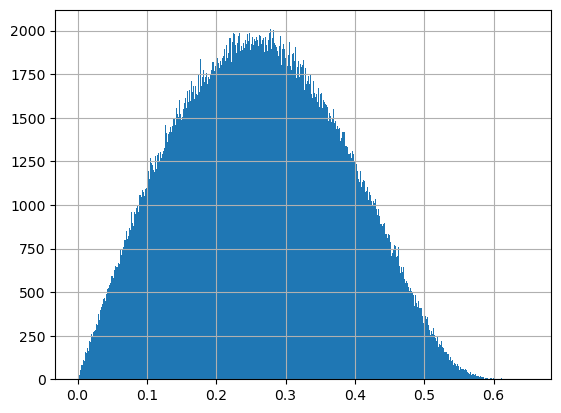

In [7]:
df['I1'].hist(bins=1000)

In [8]:
(df['I1']).describe()

count    1000000.000000
mean           0.263090
std            0.117404
min            0.000219
25%            0.173365
50%            0.260887
75%            0.349999
max            0.650657
Name: I1, dtype: float64

<Axes: >

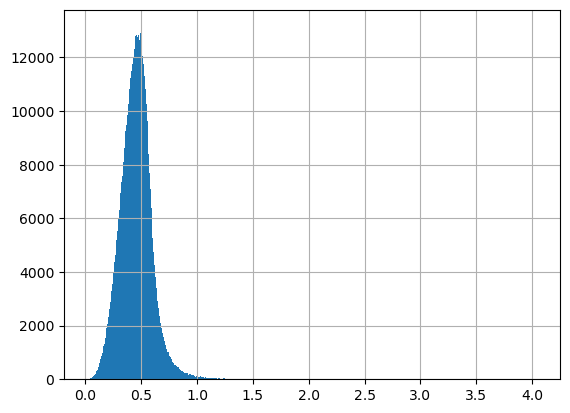

In [9]:
(df['I2']).hist(bins=1000)

<Axes: >

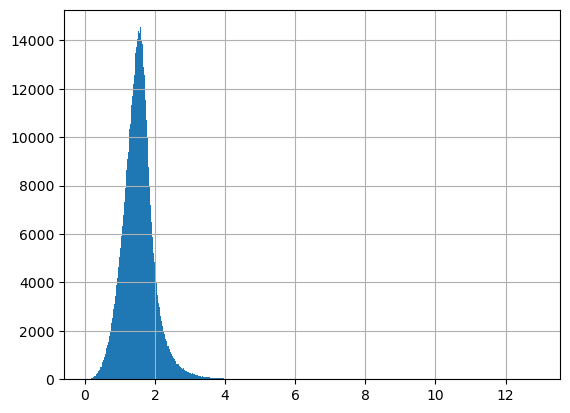

In [10]:
(1/df['I3']).hist(bins=1000)

<Axes: >

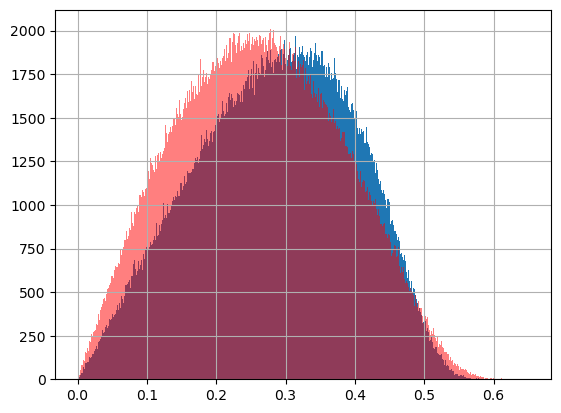

In [11]:
m = (df['I1']*df['I4']).mean()
(m/df['I4']).hist(bins=1000)
(df['I1']).hist(bins=1000, color="red", alpha=0.5)

Similar stats as in the plain case: the product of 1st and 4th minimum appears to be bounded by something like $pN^3\log(p)$

In [12]:
df.describe()

,I1,I2,I3,I4,p1,p2,p3,p4,prodI
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.263090,0.455918,0.719264,1.512345,468.586522,468.240854,468.892613,468.862248,1.349049
std,0.117404,0.143714,0.285093,2.384085,301.481606,301.445383,301.733594,301.577314,0.217131
min,0.000219,0.011856,0.077447,0.524701,0.000000,0.000000,0.000000,0.000000,1.001171
25%,0.173365,0.364944,0.567263,0.844619,209.000000,209.000000,209.000000,209.000000,1.189038
50%,0.260887,0.454586,0.657299,1.081684,465.000000,465.000000,465.000000,465.000000,1.307627
75%,0.349999,0.535787,0.794377,1.555396,721.000000,721.000000,721.000000,721.000000,1.462581
max,0.650657,4.047677,19.451062,517.275854,1017.000000,1017.000000,1017.000000,1017.000000,3.291286


Analyzing the quantiles in geometric progressoin (ratio 4) reveals a geometric progression of ratio 2 in the last minimum (`pct_change()` computes the "economist's ratio" between a row and its predecessor, so ratio is `1 + pct_change`)

In [13]:
df.quantile([1-1/4**i for i in range(1,10)])

,I1,I2,I3,I4,p1,p2,p3,p4,prodI
0.750000,0.349999,0.535787,0.794377,1.555396,721.0,721.0,721.0,721.0,1.462581
0.937500,0.448604,0.657707,1.127831,3.095741,932.0,932.0,932.0,932.0,1.723680
0.984375,0.503126,0.816519,1.591874,6.117525,996.0,996.0,996.0,996.0,1.961347
0.996094,0.538078,1.021940,2.255294,12.011075,1017.0,1017.0,1017.0,1017.0,2.184538
0.999023,0.563317,1.292259,3.170663,24.094001,1017.0,1017.0,1017.0,1017.0,2.403262
0.999756,0.585177,1.626711,4.402554,47.684068,1017.0,1017.0,1017.0,1017.0,2.609571
0.999939,0.604947,2.029714,5.917721,94.155681,1017.0,1017.0,1017.0,1017.0,2.808926
0.999985,0.616837,2.565942,7.623379,182.088562,1017.0,1017.0,1017.0,1017.0,3.018988
0.999996,0.632350,3.564524,10.821899,343.484629,1017.0,1017.0,1017.0,1017.0,3.200188


In [14]:
df.quantile([1-1/4**i for i in range(1,10)]).pct_change()

,I1,I2,I3,I4,p1,p2,p3,p4,prodI
0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.937500,0.281729,0.227554,0.419767,0.990324,0.292649,0.292649,0.292649,0.292649,0.178519
0.984375,0.121538,0.241463,0.411448,0.976110,0.068670,0.068670,0.068670,0.068670,0.137884
0.996094,0.069471,0.251582,0.416754,0.963388,0.021084,0.021084,0.021084,0.021084,0.113795
0.999023,0.046904,0.264516,0.405876,1.005982,0.000000,0.000000,0.000000,0.000000,0.100124
0.999756,0.038807,0.258812,0.388528,0.979085,0.000000,0.000000,0.000000,0.000000,0.085845
0.999939,0.033784,0.247741,0.344156,0.974573,0.000000,0.000000,0.000000,0.000000,0.076394
0.999985,0.019655,0.264188,0.288229,0.933909,0.000000,0.000000,0.000000,0.000000,0.074784
0.999996,0.025149,0.389168,0.419567,0.886360,0.000000,0.000000,0.000000,0.000000,0.060020


Plotting in loglog scale delivers no surprises

<Axes: >

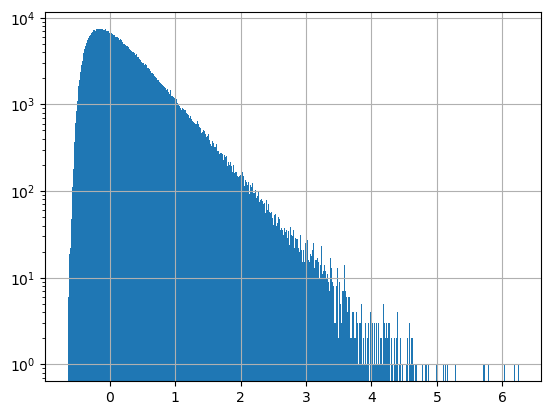

In [15]:
np.log(df['I4']).hist(bins=1000, log=True)

np.float64(0.31355527951227946)

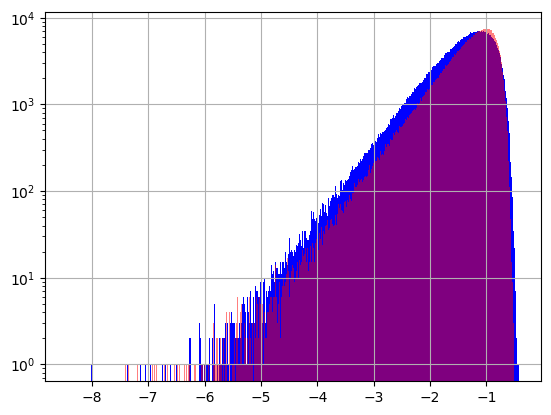

In [16]:
m = (df['I1']*df['I4']).mean()
np.log(df['I1']).hist(bins=1000, log=True, color='blue')
np.log(m/df['I4']).hist(bins=1000, log=True, alpha=0.5, color='red')
m

<Axes: >

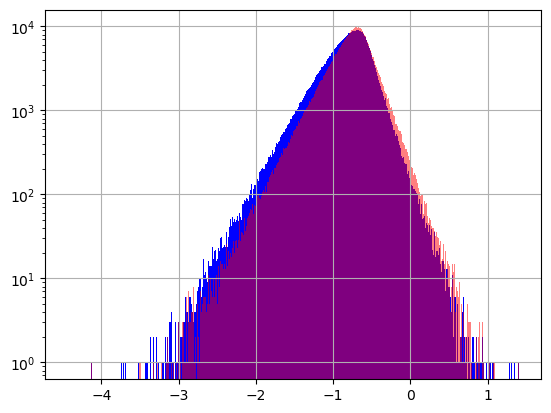

In [17]:
np.log(df['I2']).hist(bins=1000, log=True, color='blue')
np.log(m/df['I3']).hist(bins=1000, log=True, alpha=0.5, color='red')

We find the same linear correlation between the first and the inverse of the last minimum

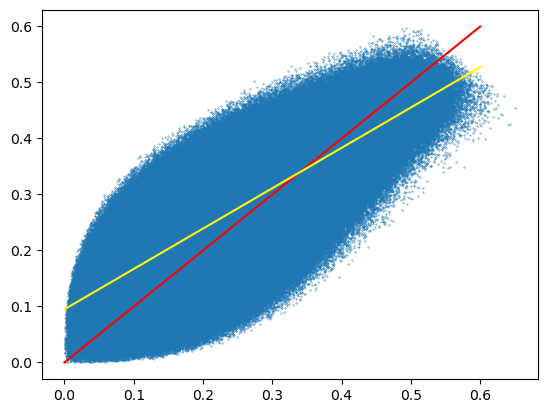

In [18]:
m = (df['I1'] * df['I4']).mean()
plt.scatter(df['I1'], m/df['I4'], s=0.1)
plt.plot((0,0.6), (0,0.6), 'red')
# least squares approximation
(λ, c), res, rank, s = np.linalg.lstsq(np.array([df['I1'], np.repeat(1, len(df))]).transpose(), m/df['I4'])
plt.plot((0,0.6), (c, 0.6*λ + c), 'yellow')

Same sort of pointy hyperbola correlation between 2nd and 3rd

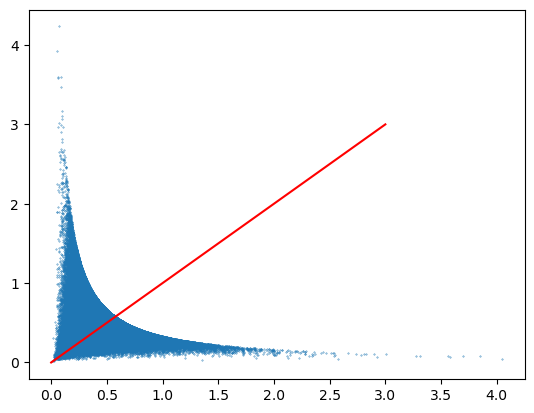

In [19]:
m = (df['I2'] * df['I3']).mean()
plt.scatter(df['I2'], m/df['I3'], s=0.1)
plt.plot((0,3), (0,3), 'red')

In [20]:
(df['I1']*df['I4']).describe()

count    1000000.000000
mean           0.313555
std            0.178174
min            0.002319
25%            0.227520
50%            0.291031
75%            0.356521
max           16.680378
dtype: float64

## Analyzing classes mod N

It seems the 4 minima cannot all be even, but all other cases appear with equal probability

In [21]:
df['parities'] = df['p1'] % 2 + 2*(df['p2'] % 2) + 4*(df['p3'] % 2) + 8*(df['p4'] % 2)

In [22]:
df.groupby('parities')['parities'].count()

parities
1.0     66578
2.0     66329
3.0     66810
4.0     66668
5.0     66830
6.0     66610
7.0     66815
8.0     66220
9.0     66546
10.0    66585
11.0    66703
12.0    67267
13.0    66849
14.0    67079
15.0    66111
Name: parities, dtype: int64

Some classes modulo N are favoured, irrespective of which minimum

<Axes: xlabel='p1'>

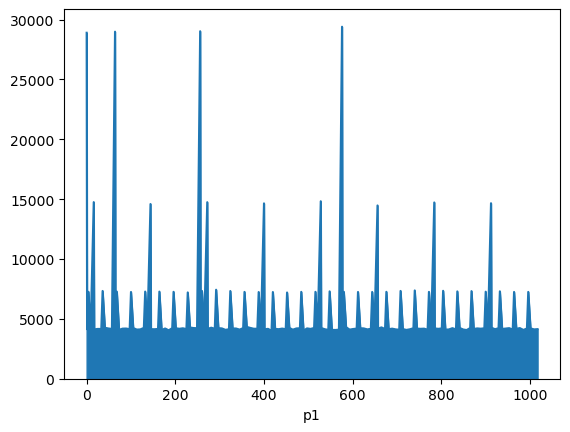

In [23]:
df.groupby('p1')['p1'].count().plot(kind='area')

<Axes: xlabel='p2'>

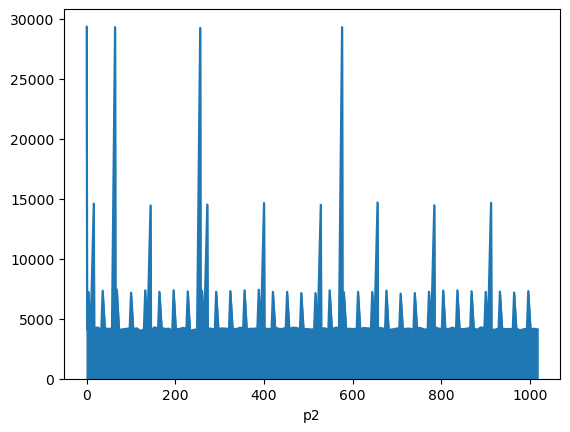

In [24]:
df.groupby('p2')['p2'].count().plot(kind='area')

<Axes: xlabel='p3'>

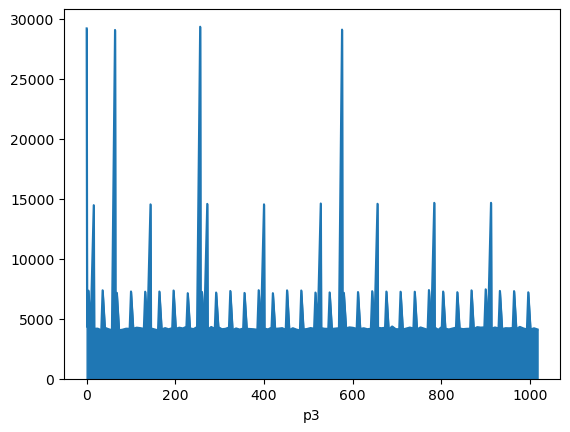

In [25]:
df.groupby('p3')['p3'].count().plot(kind='area')

<Axes: xlabel='p4'>

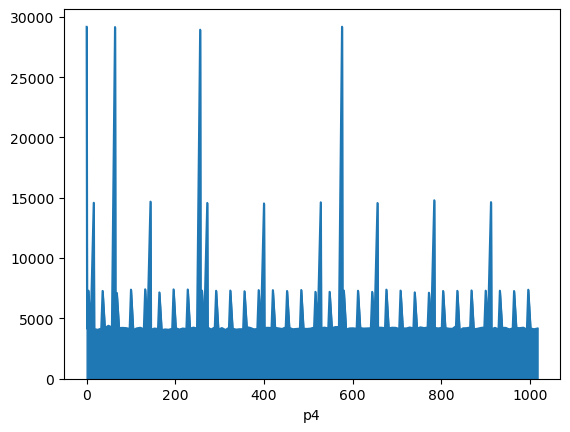

In [26]:
df.groupby('p4')['p4'].count().plot(kind='area')